Week 8 Visualizing time series data 

Acquire power data from this source for at least 10 days and not more than 40 days. The website limits the window size, so you will need to download multiple files. Load the data into a Jupyter Notebook. Combine the multiple input files to create a single dataframe.

Create two bar graphs of the power consumption per hour.

One bar graph has 24 bars; each bar is the average across all days for that hour​
one bar graph has 24*(number of days) bars. Your choice of average or sum for each hour. Label the y-axis appropriately.
Submit the .ipynb file containing the analysis and the generated pictures.​

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# loading csv file 
file_path = 'RollingSystemDemand-2024-09-22T15_30_00.000Z-2024-10-22T15_30_00.000Z.csv'
power_data = pd.read_csv(file_path)

#displaying first few rows of dataframe 
power_data.head()


,RecordType,StartTime,Demand
0,VD,2024-09-22T15:30:00Z,29655
1,VD,2024-09-22T15:35:00Z,30101
2,VD,2024-09-22T15:40:00Z,30535
3,VD,2024-09-22T15:45:00Z,30749
4,VD,2024-09-22T15:50:00Z,31040


In [45]:
#extracting date and hour to plot them 

#converting 'StartTime' column to datetime format for extraction 
power_data['StartTime'] = pd.to_datetime(power_data['StartTime'])

#extracting date and assigning to a new column called 'Date' 
power_data['Date'] = power_data['StartTime'].dt.date

#extracting hour and assigning to a new column called 'Hour' 
power_data['Hour'] = power_data['StartTime'].dt.hour

power_data.head() #verifying changes 


,RecordType,StartTime,Demand,Date,Hour
0,VD,2024-09-22 15:30:00+00:00,29655,2024-09-22,15
1,VD,2024-09-22 15:35:00+00:00,30101,2024-09-22,15
2,VD,2024-09-22 15:40:00+00:00,30535,2024-09-22,15
3,VD,2024-09-22 15:45:00+00:00,30749,2024-09-22,15
4,VD,2024-09-22 15:50:00+00:00,31040,2024-09-22,15


In [46]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-mean/
#https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/
#calculating average demand for every hour across all days 
avg_hourly_demand = power_data.groupby('Hour')['Demand'].mean()

#calculating sum of demand for every hour for each day 
avg_daily_hourly_demand = power_data.groupby(['Date', 'Hour'])['Demand'].sum()


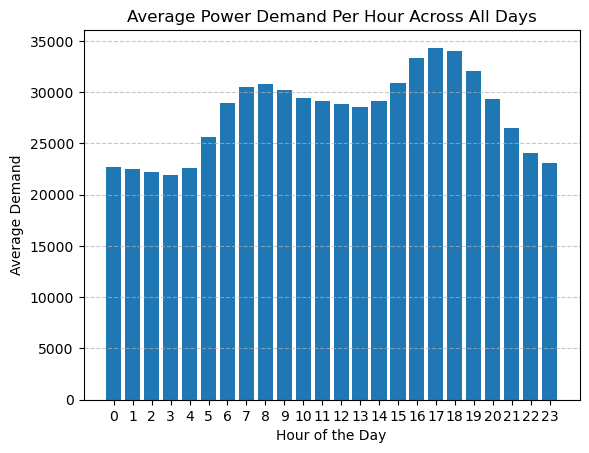

In [47]:
#Graph 1: Average demand per hour across all days
plt.bar(avg_hourly_demand.index, avg_hourly_demand.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Demand')
plt.title('Average Power Demand Per Hour Across All Days')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

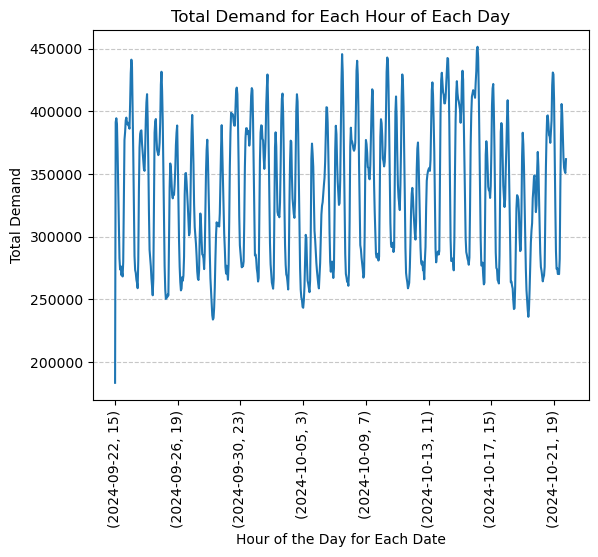

In [49]:
#Graph 2: Sum demand for each hour of each day
avg_daily_hourly_demand.plot()
plt.xlabel('Hour of the Day for Each Date')
plt.ylabel('Total Demand')
plt.title('Total Demand for Each Hour of Each Day')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
